# Medical Cost Prediction: Model Development and Evaluation

In this notebook, we'll build a multiple linear regression model to predict medical costs. We'll focus not just on creating accurate predictions, but also on understanding how different factors influence medical costs.

Our journey will include:
1. Preparing our data for modeling
2. Building and training our model
3. Evaluating model performance
4. Interpreting feature importance
5. Making predictions with our model
6. Saving and loading our trained model

## 1. Setting Up Our Environment

First, let's import the necessary libraries. We'll use scikit-learn for our modeling work.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import os

In [2]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

In [4]:
# Set visualization style
plt.style.use('seaborn')
sns.set_palette('husl')

## 2. Loading and Preparing the Data

We'll load our preprocessed data from the previous notebook and prepare it for modeling.

In [5]:
# Load the preprocessed data
df = pd.read_csv('../data/clean_data.csv')
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_age,bmi_smoker
0,19,False,27.900,0,True,16884.92400,False,False,True,530.100,27.9
1,18,True,33.770,1,False,1725.55230,False,True,False,607.860,0.0
2,28,True,33.000,3,False,4449.46200,False,True,False,924.000,0.0
3,33,True,22.705,0,False,21984.47061,True,False,False,749.265,0.0
4,32,True,28.880,0,False,3866.85520,True,False,False,924.160,0.0


In [6]:
# Separate features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1070, 10)
Testing set shape: (268, 10)


## 3. Building and Training the Model

Now we'll create and train our multiple linear regression model. Linear regression is a good choice for this problem because:

- It helps us understand the relationship between each feature and medical costs
- It provides interpretable coefficients
- It works well when relationships are approximately linear

In [8]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 4. Model Evaluation

Let's evaluate our model's performance using several metrics and visualizations.

In [10]:
# Define function to evaluate model performance
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Performance metrics for {dataset_name}:")
    print(f"R² Score: {r2:.3f}")
    print(f"Root Mean Squared Error: ${rmse:,.2f}")
    print(f"Mean Absolute Error: {mae:,.2f}")
    print()

In [11]:
# Evaluate on both training and test sets
evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_test, y_test_pred, "Test Set")

Performance metrics for Training Set:
R² Score: 0.834
Root Mean Squared Error: $4,891.90
Mean Absolute Error: 2,971.76

Performance metrics for Test Set:
R² Score: 0.866
Root Mean Squared Error: $4,567.66
Mean Absolute Error: 2,759.83



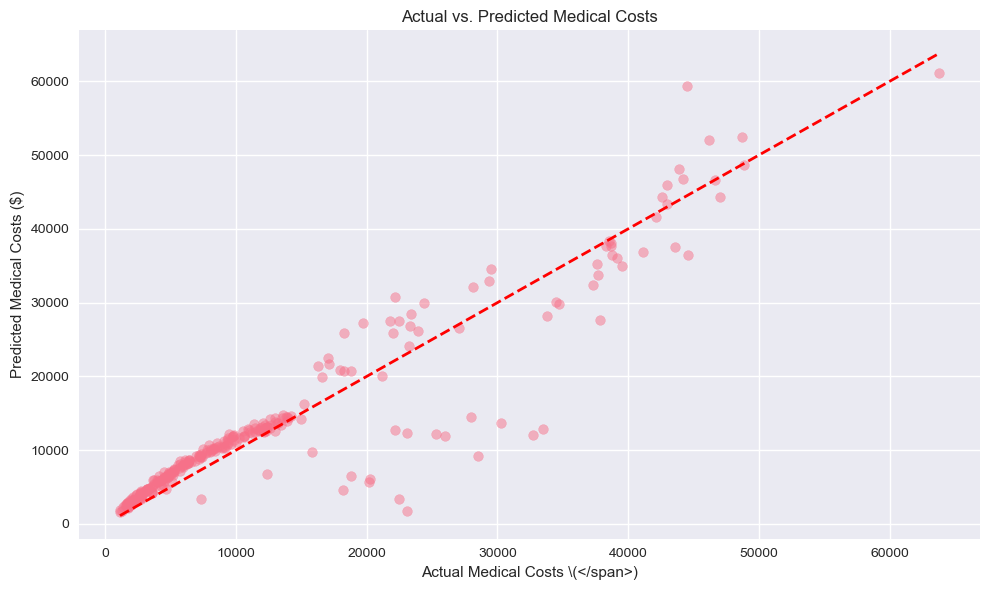

In [12]:
# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Medical Costs ($)')
plt.ylabel('Predicted Medical Costs ($)')
plt.title('Actual vs. Predicted Medical Costs')
plt.tight_layout()
plt.show()

## 5. Feature Importance Analysis

Let's examine which factors have the strongest influence on medical costs.

In [13]:
# Create dataframe of feature coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

In [14]:
# Sort by absolute value of coefficient
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

In [15]:
# Print feature importance analysis
print("Feature Importance Analysis:")
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']}: ${row['Coefficient']:,.2f}")


Feature Importance Analysis:
smoker: $-21,316.36
bmi_smoker: $1,474.67
region_southwest: $-1,242.81
region_southeast: $-956.27
region_northwest: $-621.84
sex: $-539.73
children: $465.42
age: $213.43
bmi: $-42.27
bmi_age: $1.61


## 6. Making Predictions

Let's create a function to make predictions for new individuals.

In [16]:
# Define function to predict medical cost for a new individual
def predict_medical_cost(age, sex, bmi, children, smoker, region):
    """
    Predict medical costs for a new individual.

    Parameters:
        age (int): Age of the individual
        sex (str): 'male' or 'female'
        bmi (float): Body Mass Index
        children (int): Number of children
        smoker (str): 'yes' or 'no'
        region (str): 'northeast', 'northwest', 'southeast', or 'southwest'

    Returns:
        float: Predicted medical cost
    """
    
    # Create a dataframe with the same structure as training data
    data = pd.DataFrame({
        'age': [age],
        'sex': [1 if sex == 'male' else 0],
        'bmi': [bmi],
        'children': [children],
        'smoker': [1 if smoker == 'yes' else 0]
    })

    # Add region columns
    regions = ['northwest', 'southeast', 'southwest']

## 7. Saving the Trained Model

Let's create a function to save the trained machine learning model to disk.

In [18]:
# Define function to save the trained model to disk
def save_model(model, filepath):
    """
    Save a trained machine learning model to disk.
    
    Parameters:
        model: The trained scikit-learn model to save
        filepath: String, path where the model should be saved
    """
    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    
    # Open the file in binary write mode and save the model
    with open(filepath, 'wb') as file:
        pickle.dump(model, file)
        
    print(f"Model successfully saved to: {filepath}")

In [19]:
# Define function to load the trained model from disk
def load_model(filepath):
    """
    Load a trained machine learning model from disk.
    
    Parameters:
        filepath: String, path to the saved model file
    
    Returns:
        The loaded scikit-learn model
    """
    # Check if the file exists before trying to load it
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"No model file found at: {filepath}")
    
    # Open the file in binary read mode and load the model
    with open(filepath, 'rb') as file:
        model = pickle.load(file)
        
    print(f"Model successfully loaded from: {filepath}")
    return model

In [20]:
# Save the model after training
model_path = '../models/final_model.pkl'
save_model(model, model_path)

Model successfully saved to: ../models/final_model.pkl


In [21]:
# Loading the model to make predictions:
loaded_model = load_model('../models/final_model.pkl')

Model successfully loaded from: ../models/final_model.pkl


In [22]:
# Using the loaded model just like the original
prediction = loaded_model.predict(X_test)